In [34]:
import gpu_tracking
path = "../../emily_tracking/sample_vids/s_20.tif"

In [35]:
tracked = gpu_tracking.batch_file(path, 9, minmass = 800, search_range = 9)

In [37]:
tracked

,frame,y,x,mass,particle
0,0,403.050232,487.099792,1421.783325,0
1,0,179.438034,495.721161,861.696289,1
2,0,235.248489,502.686188,944.213257,2
3,0,55.321613,505.944611,854.604065,3
4,0,193.442474,502.421967,1031.999878,4
...,...,...,...,...,...
730527,1999,381.228821,488.521759,926.151245,477362
730528,1999,469.970367,494.834656,832.005798,477651
730529,1999,238.729660,483.298889,990.729919,477652
730530,1999,42.429066,507.692444,892.613098,477404


In [ ]:
vid = tifffile.imread(path)

In [316]:
it = iter(tracked.groupby("particle"))

In [245]:
it = iter(tracked.groupby("frame"))

In [25]:
np.quantile(vid, 0.999)
# np.quantile(vid, 0.1)

4328.0

In [ ]:
# import tifffile
# import matplotlib.pyplot as plt
# import numpy as np
# from matplotlib.collections import LineCollection


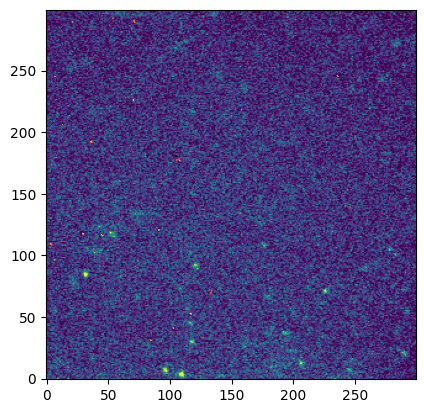

In [28]:
lcs = {}
norm = plt.Normalize(0, 20)
images = []
fig, ax = plt.subplots()
for frame, subdf in tracked.groupby("frame"):
    if frame == 20:
        break
    for entry in subdf.itertuples():
        # print(entry)
        _, frame, y, x, mass, particle = entry
        if particle in lcs:
            if isinstance(lcs[particle], LineCollection):
                segments = lcs[particle].get_segments()
                segments.append(np.vstack([segments[-1][1, :], np.array([y, x])]))
                old_array = lcs[particle].get_array()
                lcs[particle] = LineCollection(segments=segments, norm = norm, cmap = "inferno")
                lcs[particle].set_linewidth(0.5)
                lcs[particle].set_array(np.append(old_array, frame))
            else:
                first_part = lcs[particle]
                segment = [np.vstack((first_part, np.array([y, x])))]
                lcs[particle] = LineCollection(segments=segment, norm = norm, cmap = "inferno")
                lcs[particle].set_linewidth(0.5)
                lcs[particle].set_array(np.array([frame]))
        else:
            lcs[particle] = np.array([y, x])
    ax.imshow(vid[frame], origin = "lower", vmin = 2475.0, vmax = 5000)
    for lc in lcs.values():
        if isinstance(lc, LineCollection):
            ax.add_collection(lc)
    plt.savefig(f"pngs/{frame}.png")
    # plt.close()


16 [0 1]


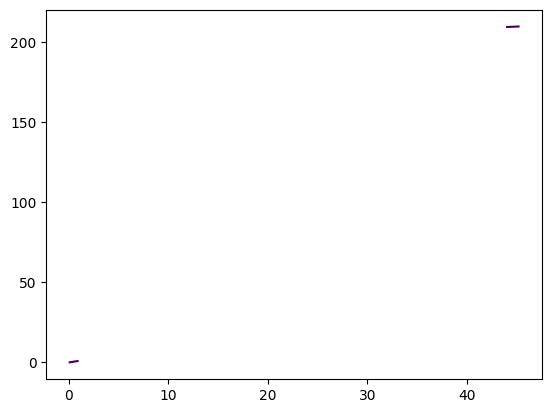

In [350]:
part, df = next(it)
norm = plt.Normalize(0, 1999)
pos = df[["y", "x"]].to_numpy().reshape(-1, 1, 2)
segments = np.concatenate([pos[:-1], pos[1:]], axis = 1)
frames = df["frame"].to_numpy()
print(part, frames)

lc = LineCollection(segments, cmap = "viridis", norm = norm)
lc.set_array(frames)
# lc.set_segments(np.array([]))
new_segments = lc.get_segments()
new_segments.append(np.array([[0, 0], [1, 1]]))
lc.set_segments(new_segments)
# lc.set_linewidth(2)
fig, ax = plt.subplots()
ax.add_collection(lc)
ax.autoscale()

In [354]:
np.vstack((lc.get_segments()[-1][1, :], np.array([0, 1])))

array([[1., 1.],
       [0., 1.]])

In [358]:
lc.set_array([0, 3])

In [359]:
lc.get_array()

masked_array(data=[0, 3],
             mask=False,
       fill_value=999999)

In [ ]:
plt.plot()

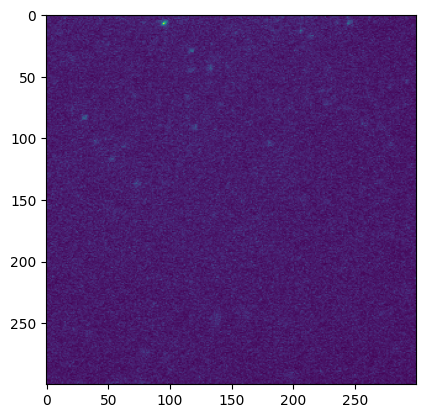

In [9]:
plt.imshow(vid[0])